# Example of using the orm classes

Imports

In [1]:
from os import remove
from utils.io import striplog_from_text
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base, LinkIntervalComponentOrm
from striplog import Lexicon, Striplog, Component
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

In [2]:
remove('./tmp_files/test_orm_db_2.db')

Create the db engine and the database structure

In [3]:
engine = create_engine('sqlite:///tmp_files/test_orm_db_2.db', echo=True)

In [4]:
Base.metadata.create_all(engine)

2021-03-13 12:10:02,308 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-13 12:10:02,310 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,311 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-13 12:10:02,312 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,313 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-03-13 12:10:02,314 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,315 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-03-13 12:10:02,316 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,317 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-03-13 12:10:02,317 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,318 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-03-13 12:10:02,321 INFO sqlalchemy.engine.base.Engine ()
2021-03-13

### Create the objects from las files

In [5]:
lexicon = Lexicon.default()

In [6]:
borehole_dict = {'F01':ROOT_DIR+'/data/test.las', 'F02':ROOT_DIR+'/data/test.csv'} # boreholes to insert into the db

In [7]:
int_id = 0
bh_id = 0
pos_id = 0
boreholes = []
components = []
comp_id = 0
component_dict={}
link_dict={}
pos_dict = {}
x = [0., 20.]
y = [0., 120.]

for bh, filename in borehole_dict.items():
    interval_number = 0
    boreholes.append(BoreholeOrm(id=bh))
    
    strip=striplog_from_text(filename)
    
    for c in strip.components:
        if c not in component_dict.keys():
            component_dict.update({c:comp_id})
            comp_id += 1
    d ={}
    for interval in strip:
        top = PositionOrm(id=pos_id, upper=interval.top.upper, 
                          middle=interval.top.middle,  
                          lower=interval.top.lower, 
                          x=x[bh_id], y=y[bh_id])
        
        base = PositionOrm(id=pos_id+1, upper=interval.base.upper, 
                           middle=interval.base.middle,  
                           lower=interval.base.lower, 
                           x=x[bh_id], y=y[bh_id])
        
        d.update({int_id:{'description':interval.description, 
                          'interval_number' : interval_number, 
                          'top': top, 'base': base
                         }})
        
        for i in interval.components:
            if i != Component({}):
                link_dict.update({(int_id, component_dict[i]) : {'extra_data': 'test'}})
        
        interval_number+=1
        int_id += 1
        pos_id += 2

 

    print(d)
    boreholes[bh_id].intervals_values = d
    #boreholes[bh_id].components_values = c
    bh_id += 1 
components = {v:k for k,v in component_dict.items()}

{0: {'description': 'Anhydrite', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1eb435f460>, 'base': <core.orm.PositionOrm object at 0x7f1e0ba07820>}, 1: {'description': 'Sandstone, grey, vf-f', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1e0ba07ac0>, 'base': <core.orm.PositionOrm object at 0x7f1e0ba07af0>}, 2: {'description': 'Anhydrite', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1e0ba07a60>, 'base': <core.orm.PositionOrm object at 0x7f1e0b6d1dc0>}, 3: {'description': 'Dolomite', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1e0b6d1730>, 'base': <core.orm.PositionOrm object at 0x7f1e0b6d1fa0>}, 4: {'description': 'Anhydrite', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1e0b6d1d90>, 'base': <core.orm.PositionOrm object at 0x7f1e0ba14fd0>}, 5: {'description': 'Sandstone, grey, vf-f', 'interval_number': 5, 'top': <core.orm.PositionOrm object at 0x7f1e0b6e3d00>, 'base': <core.orm.Position

In [8]:
link_dict

{(0, 1): {'extra_data': 'test'},
 (1, 2): {'extra_data': 'test'},
 (2, 1): {'extra_data': 'test'},
 (3, 3): {'extra_data': 'test'},
 (4, 1): {'extra_data': 'test'},
 (5, 2): {'extra_data': 'test'},
 (6, 4): {'extra_data': 'test'},
 (7, 3): {'extra_data': 'test'},
 (8, 0): {'extra_data': 'test'},
 (9, 3): {'extra_data': 'test'},
 (10, 2): {'extra_data': 'test'},
 (11, 3): {'extra_data': 'test'},
 (12, 2): {'extra_data': 'test'},
 (13, 0): {'extra_data': 'test'},
 (14, 3): {'extra_data': 'test'},
 (15, 0): {'extra_data': 'test'},
 (16, 3): {'extra_data': 'test'},
 (17, 0): {'extra_data': 'test'},
 (18, 3): {'extra_data': 'test'},
 (19, 0): {'extra_data': 'test'},
 (20, 3): {'extra_data': 'test'},
 (21, 0): {'extra_data': 'test'},
 (22, 3): {'extra_data': 'test'},
 (23, 5): {'extra_data': 'test'},
 (25, 1): {'extra_data': 'test'},
 (26, 2): {'extra_data': 'test'},
 (27, 4): {'extra_data': 'test'}}

Create the session

In [9]:
Session = sessionmaker(bind=engine)
session = Session()

Create the project

In [10]:
p = Project(session)
p.add_components(components)

2021-03-13 12:10:02,436 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-13 12:10:02,437 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-13 12:10:02,438 INFO sqlalchemy.engine.base.Engine ()
2021-03-13 12:10:02,441 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-03-13 12:10:02,442 INFO sqlalchemy.engine.base.Engine ((0, 'Siltstone, grey'), (1, 'Anhydrite'), (2, 'Sandstone, vf-f, grey'), (3, 'Dolomite'), (4, 'Siltstone, red'), (5, 'Limestone'))
2021-03-13 12:10:02,444 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-13 12:10:02,447 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-13 12:10:02,448 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021

In [11]:
boreholes

[<core.orm.BoreholeOrm>(id=F01, length=None, diameter=None, intervals=25),
 <core.orm.BoreholeOrm>(id=F02, length=None, diameter=None, intervals=3)]

Add boreholes into the database

In [12]:
for bh in boreholes:
    p.add_borehole(bh)

2021-03-13 12:10:02,461 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-13 12:10:02,462 INFO sqlalchemy.engine.base.Engine ('F01', 0.0, 0.0)
2021-03-13 12:10:02,466 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-13 12:10:02,467 INFO sqlalchemy.engine.base.Engine ((0, 14.3, 14.3, 14.3, 0.0, 0.0), (1, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (2, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (3, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (4, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (5, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (6, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (7, 58.86470588235295, 58.86470588235295, 58.86470588235295, 0.0, 0.0)  ... displaying 10 of 50 total bound parameter sets ...  (48, 

2021-03-13 12:10:02,548 INFO sqlalchemy.engine.base.Engine (14,)
2021-03-13 12:10:02,551 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,552 INFO sqlalchemy.engine.base.Engine (15,)
2021-03-13 12:10:02,556 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,557 INFO sqlalchemy.engine.base.Engine (16,)
2021-03-13 12:10:02,559 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-03-13 12:10:02,623 INFO sqlalchemy.engine.base.Engine (35,)
2021-03-13 12:10:02,627 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,628 INFO sqlalchemy.engine.base.Engine (36,)
2021-03-13 12:10:02,632 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,633 INFO sqlalchemy.engine.base.Engine (37,)
2021-03-13 12:10:02,636 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-03-13 12:10:02,783 INFO sqlalchemy.engine.base.Engine (51,)
2021-03-13 12:10:02,787 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,788 INFO sqlalchemy.engine.base.Engine (52,)
2021-03-13 12:10:02,790 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-13 12:10:02,790 INFO sqlalchemy.engine.base.Engine (53,)
2021-03-13 12:10:02,795 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

In [13]:
p.add_link_between_components_and_intervals(link_dict)

2021-03-13 12:10:02,867 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-13 12:10:02,868 INFO sqlalchemy.engine.base.Engine (6.0, 'F02')
2021-03-13 12:10:02,871 INFO sqlalchemy.engine.base.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-03-13 12:10:02,872 INFO sqlalchemy.engine.base.Engine ((0, 1, 'test'), (1, 2, 'test'), (2, 1, 'test'), (3, 3, 'test'), (4, 1, 'test'), (5, 2, 'test'), (6, 4, 'test'), (7, 3, 'test')  ... displaying 10 of 27 total bound parameter sets ...  (26, 2, 'test'), (27, 4, 'test'))
2021-03-13 12:10:02,874 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-13 12:10:02,878 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-13 12:10:02,879 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-13 12:10:02,880 INFO sqlalchemy.engin

In [14]:
p.boreholes[0].id

'F01'

In [15]:
p.commit()

2021-03-13 12:10:02,893 INFO sqlalchemy.engine.base.Engine COMMIT


In [16]:
p.boreholes[0].intervals[0].description

2021-03-13 12:10:02,901 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-13 12:10:02,902 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-13 12:10:02,903 INFO sqlalchemy.engine.base.Engine ('F01',)
2021-03-13 12:10:02,905 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-13 12:10:02,906 INFO sqlalchemy.engine.base.Engine ('F01',)


'Anhydrite'

In [17]:
p.boreholes[0].intervals[0]

In [18]:
session.close()

2021-03-13 12:10:02,921 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [19]:
p.plot3d(x3d=True)

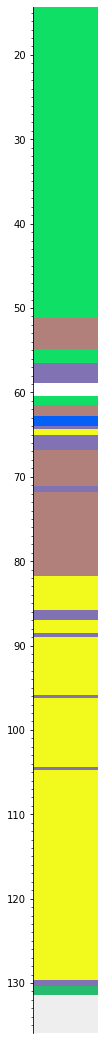

In [20]:
p.boreholes_3d[0].plot()